In [1]:
import $ivy.`org.plotly-scala::plotly-almond:0.8.1`;
interp.load.cp(os.Path(os.RelPath("../target/scala-2.12/scalacollections-assembly-0.1.0-SNAPSHOT.jar"), os.pwd));

import $ivy.$                                      


In [3]:
import parallel.common.ParallelismDepth._;
import parallel.parCollections._;
import parallel.parCollections.testRunners.ParArrayTestRunner._;

val cols = Seq(
      new ParArray[Int](Array.fill(1000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(10000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(100000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(1000000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(10000000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(100000000)(scala.util.Random.nextInt(100)))
    );

val pds = Seq[ParallelismDepth[ParArray[Int]]](
  ParallelismDepth.partitionsExp[ParArray[Int]](8),
  ParallelismDepth.nCores()
);

def fMap(el: Int): Int = el + 2;

val testResults = testParArrayMap[Int, Int](cols, pds, fMap);

val times = testResults.times;
val speedups = testResults.speedups;

import parallel.common.ParallelismDepth._;

import parallel.parCollections._;

import parallel.parCollections.testRunners.ParArrayTestRunner._;


cols: Seq[ParArray[Int]] = List(
  parallel.parCollections.ParArray@69728588,
  parallel.parCollections.ParArray@78065cf9,
  parallel.parCollections.ParArray@19f5632f,
  parallel.parCollections.ParArray@4c5000e7,
  parallel.parCollections.ParArray@4f742ae1,
  parallel.parCollections.ParArray@317da483
)
pds: Seq[ParallelismDepth[ParArray[Int]]] = List(
  NPartitionsThreshold(256),
  NCoresThreshold(cores: 8, partitions: 8)
)
defined function fMap
testResults: parallel.common.ParallelTestResults = ParallelTestResults(
  Map(
    "NPartitionsThreshold(256)" -> List(
      (1000, 0.07015163750000002),
      (10000, 0.09312393749999999),
      (100000, 0.21681353750000004),
      (1000000, 0.9776973374999998),
      (10000000, 8.1435770625),
      (100000000, 81.68215205000003)
    ),
    "Sequential" -> List(
      (1000, 0.03466931249999999),
  

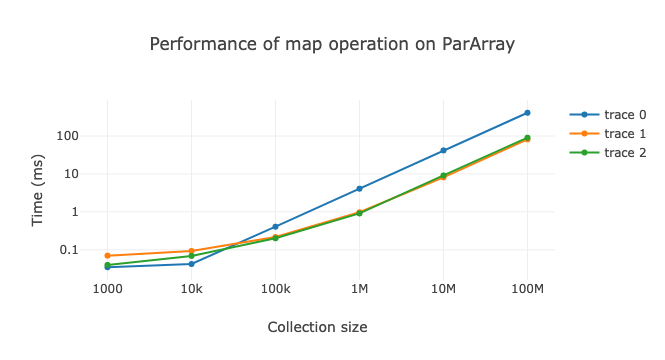

import plotly._;

import plotly.element._;

import plotly.layout._;

import plotly.Almond._;


x: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y: Seq[Double] = List(
  0.03466931249999999,
  0.042195825000000006,
  0.40700260000000005,
  4.0886558,
  41.751346925000014,
  410.95072921249994
)
x2: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y2: Seq[Double] = List(
  0.07015163750000002,
  0.09312393749999999,
  0.21681353750000004,
  0.9776973374999998,
  8.1435770625,
  81.68215205000003
)
x3: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y3: Seq[Double] = List(
  0.0399469125,
  0.06899688750000002,
  0.20124217499999997,
  0.9098635249999998,
  9.133226612499994,
  90.423323425
)
sequential: Scatter = Scatter(
  Some(Doubles(List(1000.0, 10000.0, 100000.0, 1000000.0, 1.0E7, 1.0E8))),
  Some(
    Doubles(
      List(
        0.03466931249999999,
        0.042195825000000006,
        0.40700260000000005,
        4.088655

In [4]:
import plotly._;
import plotly.element._;
import plotly.layout._;
import plotly.Almond._;

val (x, y) = times.get("Sequential").get.unzip;
val (x2, y2) = times.get("NPartitionsThreshold(256)").get.unzip;
val (x3, y3) = times.get("NCoresThreshold(cores: 8, partitions: 8)").get.unzip;

val sequential = Scatter(x,y);
val partitions256 = Scatter(x2,y2);
val cores8 = Scatter(x3,y3);

val data = Seq(sequential, partitions256, cores8);

val layout = Layout(
    title = "Performance of map operation on ParArray",
    xaxis = Axis(title = "Collection size", `type` = AxisType.Log),
    yaxis = Axis(title = "Time (ms)", `type` = AxisType.Log)
);

plot(data, layout = layout)

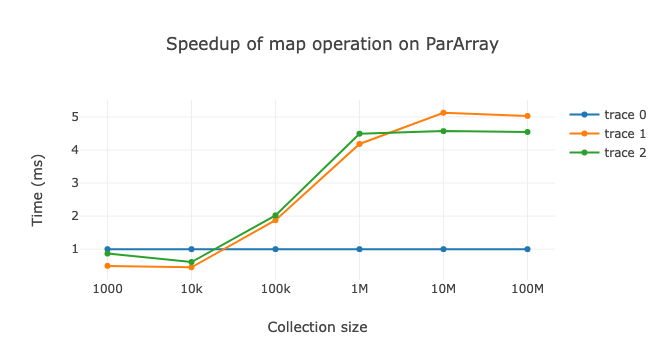

x: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y: Seq[Double] = List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
x2: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y2: Seq[Double] = List(
  0.494205320581433,
  0.45311469996637554,
  1.8772010488505588,
  4.181923835913075,
  5.126905118545381,
  5.031095764481634
)
x3: Seq[Int] = List(1000, 10000, 100000, 1000000, 10000000, 100000000)
y3: Seq[Double] = List(
  0.8678846581697643,
  0.6115612823839335,
  2.0224518046478086,
  4.493702283537524,
  4.571368772111483,
  4.5447425912558455
)
sequential: Scatter = Scatter(
  Some(Doubles(List(1000.0, 10000.0, 100000.0, 1000000.0, 1.0E7, 1.0E8))),
  Some(Doubles(List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0))),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None
)
partitions256: Scatter = Scatter(
  Some(Doubles(List(1000.0, 10000.0, 100000.0, 1000000.0, 1.0E7, 1.0E8))),
  Some

In [5]:
val (x, y) = speedups.get("Sequential").get.unzip
val (x2, y2) = speedups.get("NPartitionsThreshold(256)").get.unzip
val (x3, y3) = speedups.get("NCoresThreshold(cores: 8, partitions: 8)").get.unzip

val sequential = Scatter(x,y);
val partitions256 = Scatter(x2,y2);
val cores8 = Scatter(x3,y3);

val data = Seq(sequential, partitions256, cores8);

val layout = Layout(
    title = "Speedup of map operation on ParArray",
    xaxis = Axis(title = "Collection size", `type` = AxisType.Log),
    yaxis = Axis(title = "Time (ms)", `type` = AxisType.Linear)
);

plot(data, layout = layout)